<a href="https://colab.research.google.com/github/ArnoldoOliva/DatosMasivos/blob/main/IMBD_REVIEWS_for_sentiment_analysis_Arnoldo_Oliva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

In [ ]:
import tweepy


# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


# Create API object
api = tweepy.API(auth)

# Search parameters
query = 'Elecciones Estado de Mexico'
num_tweets = 100  # Number of tweets to retrieve

# Search tweets
#tweets=api.search_tweets(q=query,count =num_tweets,lang="es")
tweets=api.user_timeline(user_id="@AristeguiOnline", screen_name="Aristegui Noticias", 
                         count=num_tweets)


# Process tweets
# create dataframe
columns = ['Time', 'User', 'Tweet']
data = []
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.text])

dftweets = pd.DataFrame(data, columns=columns)

dftweets.to_csv('tweets.csv')
dftweets

Forbidden: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/Test.csv")
data

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [4]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)  #los numeros importan
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

test = data.loc[1,"text"]
print(test)
print()
print(limpiar_tokenizar(texto=test))

1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have a

In [5]:
data["text"]=data["text"].str.replace("<br"," ").str.replace("<"," ").str.replace("/>"," ").str.replace(">"," ")

In [7]:
data['texto_tokenizado'] = data['text'].apply(lambda x: limpiar_tokenizar(x))
data["review"]=data.index
data.head()

,text,label,texto_tokenizado,review
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4


In [8]:
data.loc[data.label==0,"label2"]="negativo"
data.loc[data.label==1,"label2"]="positivo"

In [9]:
data['num_words']=data["texto_tokenizado"].apply(lambda x: len(x))
print("Media palabras en opiniones positivas: ",np.mean(data.loc[data.label==1]["num_words"]))
print("Media palabras en opiniones negativas: ",np.mean(data.loc[data.label==0]["num_words"]))
print()

print("Desv est palabras en opiniones positivas: ",np.std(data.loc[data.label==1]["num_words"]))
print("Desv est palabras en opiniones negativas: ",np.std(data.loc[data.label==0]["num_words"]))

Media palabras en opiniones positivas:  217.30219560878243
Media palabras en opiniones negativas:  223.12825651302606

Desv est palabras en opiniones positivas:  169.44832906442073
Desv est palabras en opiniones negativas:  164.70064294573902


In [12]:
nltk.download('stopwords')
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
data2 = data.explode(column='texto_tokenizado')
data2 = data2.drop(columns='text')
data2 = data2.rename(columns={'texto_tokenizado':'token'})

In [16]:
# Filtrado para excluir stopwords
# ==============================================================================
data2 = data2[~(data2["token"].isin(stop_words))]

In [17]:
# Top 5 palabras más utilizadas por cada tipo de review (positivo, negativo)
# ==============================================================================

data2.groupby(['label2','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('label2') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))


label2  token  count
label2                                
negativo 15528  negativo  movie   4994
         8739   negativo   film   3892
         16464  negativo    one   2659
         13679  negativo   like   2327
         8031   negativo   even   1557
positivo 36066  positivo   film   4265
         43258  positivo  movie   3620
         44211  positivo    one   2679
         41327  positivo   like   1623
         37418  positivo   good   1466

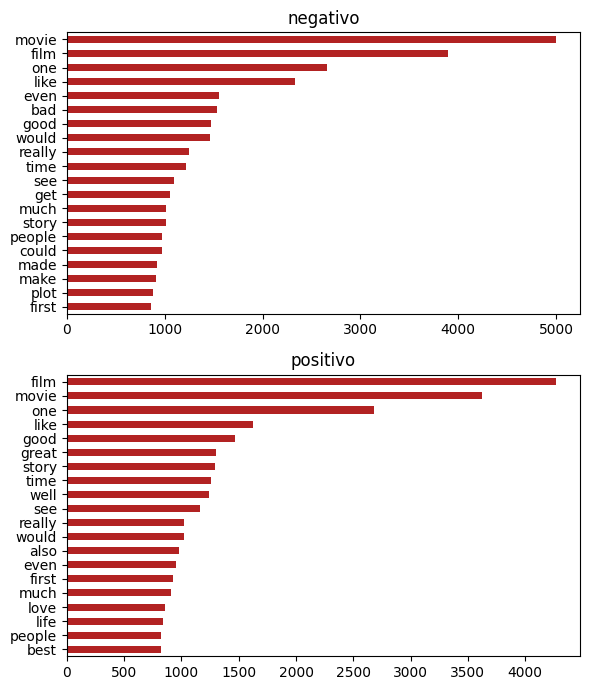

In [18]:
# Top 20 palabras por tipo de review (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 7))
for i, label2 in enumerate(data2.label2.unique()):
    df_temp = data2[data2.label2 == label2]
    counts  = df_temp['token'].value_counts(ascending=False).head(20)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(label2)

fig.tight_layout()

In [19]:
# Descarga lexicon sentimientos
# ==============================================================================
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [20]:
# Sentimiento promedio de cada review
# ==============================================================================
review_sentimientos = pd.merge(
                            left     = data2,
                            right    = lexicon,
                            left_on  = "token", 
                            right_on = "termino",
                            how      = "inner"
                      )

review_sentimientos = review_sentimientos.drop(columns = "termino")

# Se suman los sentimientos de las palabras que forman cada tweet.
review_sentimientos = review_sentimientos[["review", "label2", "sentimiento"]] \
                      .groupby(["review"])\
                      .sum().reset_index()
review_sentimientos.head()

,review,sentimiento
0,0,24
1,1,4
2,2,-14
3,3,-30
4,4,-9


In [22]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['text'].apply(clean)


In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['post cleaned'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,363,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple..."
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ..."
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc..."
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,724,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (..."
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,165,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)..."


In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['post cleaned'].apply(lemmatize)
data.head(5)

,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned,Lemma
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,363,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple...",always write series complete stink fest Jim ...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ...",st watch Dir Steve Purcell Typical Mary Kate...
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc...",movie poorly write direct fell asleep minute...
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,724,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (...",interesting thing Miryang Secret Sunshine ac...
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,165,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)...",first read berlin meer expect much thought r...


In [25]:
data.label2.value_counts()

positivo    2505
negativo    2495
Name: label2, dtype: int64

In [26]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
data['Polarity'] = data['Lemma'].apply(getPolarity) 
data['Analysis'] = data['Polarity'].apply(analysis)
data.head()

,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned,Lemma,Polarity,Analysis
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,363,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple...",always write series complete stink fest Jim ...,0.144573,Positive
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ...",st watch Dir Steve Purcell Typical Mary Kate...,-0.029945,Negative
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc...",movie poorly write direct fell asleep minute...,-0.106667,Negative
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,724,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (...",interesting thing Miryang Secret Sunshine ac...,-0.012945,Negative
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,165,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)...",first read berlin meer expect much thought r...,-0.008700,Negative


In [29]:
data.label.value_counts()

1    2505
0    2495
Name: label, dtype: int64

In [28]:
pd.crosstab(data['label2'], data['Analysis']) # 

Analysis,Negative,Positive
label2,,
negativo,1173,1322
positivo,165,2340


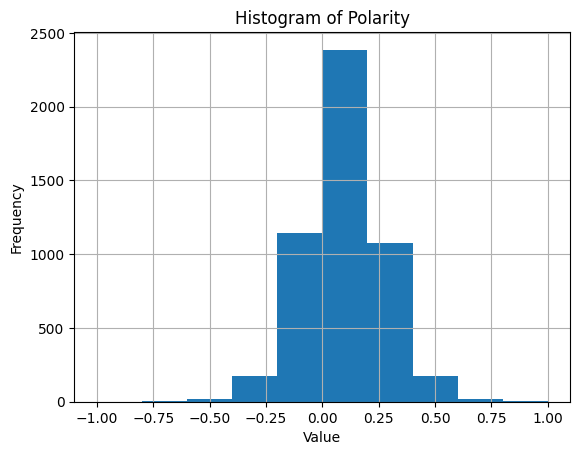

In [30]:
data['Polarity'].hist()

# Set the title and labels
plt.title('Histogram of Polarity')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

Podemos ver una gran concentración de reviews dentro del rango de 0 a 0.20, el cual son valores positivos pero muy cercanos a 0, por lo que podría ser también calificaco como review "neutral", donde podría ser que los componentes positivo y negativo se anulan.

In [40]:
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score >= 0.25:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
data['Polarity'] = data['Lemma'].apply(getPolarity) 
data['Analysis'] = data['Polarity'].apply(analysis)
#data.head()

In [42]:
data.Analysis.value_counts(normalize=True)

Neutral     0.5634
Negative    0.2676
Positive    0.1690
Name: Analysis, dtype: float64

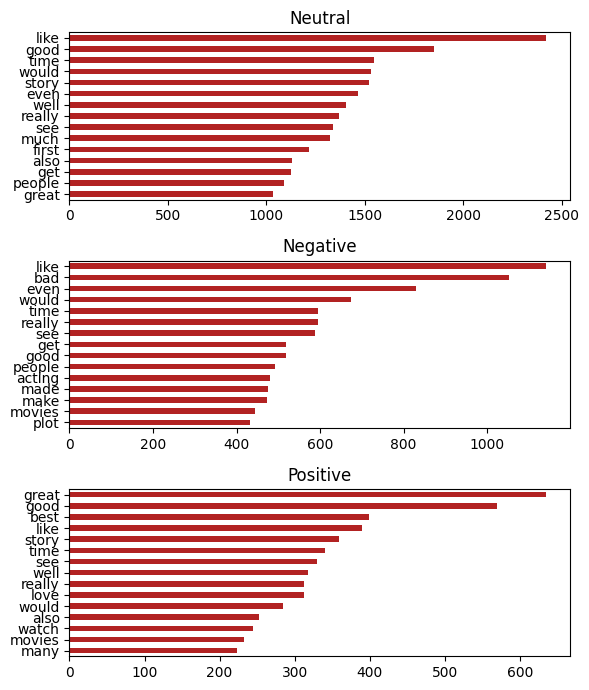

In [43]:
data2 = data.explode(column='texto_tokenizado')
data2 = data2.drop(columns='text')
data2 = data2.rename(columns={'texto_tokenizado':'token'})
data2 = data2[(~data2["token"].isin(stop_words))&(~data2['token'].isin(["br","film","one","movie"]))]

fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(6, 7))
for i, a in enumerate(data2.Analysis.unique()):
    df_temp = data2[data2.Analysis == a]
    counts  = df_temp['token'].value_counts(ascending=False).head(15)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(a)

fig.tight_layout()

Podemos apreciar que en la categoría neutral hay palabras como "like","good" y más abajo "well" y "great", pero comparando con la categoría Positive palabras con mayor connotación positiva como "great", "best" están más arriba en los conteos y otras palabras como "good" y "well" también se encuentran pero más arriba en comparación de la categoría neutral. En la categoría negativa como es de esperar se encuentran palabras como "bad", y palabras de connotación positiva no están en los primeros lugares como las otras categorías 

In [ ]:
# Ver el numero de palabras positivas y negativas por categoria

In [44]:
def count_sentiment_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)

    blob = TextBlob(filtered_text)
    polarity = blob.sentiment.polarity
    
    try:
      num_positive_words = sum(1 for word in filtered_words if TextBlob(word).sentiment.polarity > 0)
      num_negative_words = sum(1 for word in filtered_words if TextBlob(word).sentiment.polarity < 0)
    except:
        num_positive_words =0
        num_negative_words =0
      
    return num_positive_words, num_negative_words




In [45]:
data['Positive Words'], data['Negative Words'] = zip(*data['Lemma'].apply(count_sentiment_words))

In [46]:
data["Words weighted"]=data['Positive Words']- data['Negative Words']

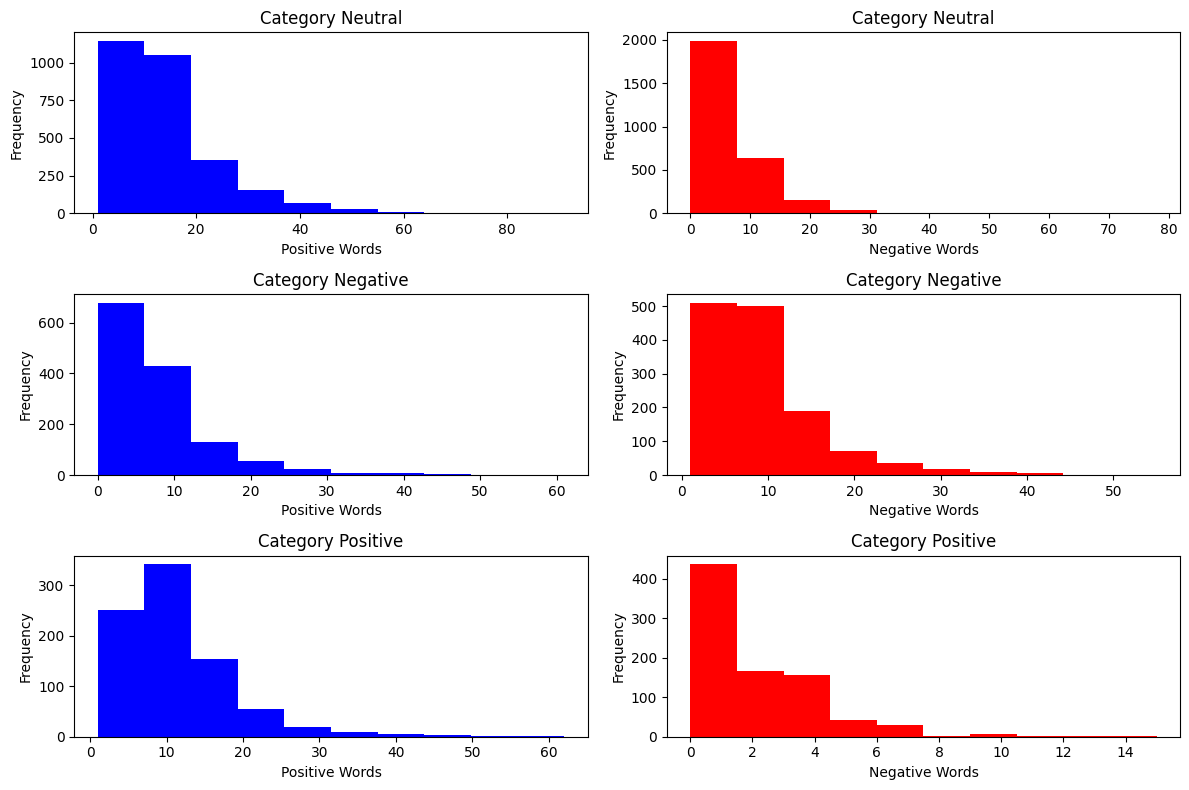

In [47]:
categories=list(data.Analysis.unique())

fig, axs = plt.subplots(len(categories), 2, figsize=(12, 8))

# Iterate over each category and plot the histograms
for i, category in enumerate(categories):
    subset = data[data['Analysis'] == category]
    axs[i, 0].hist(subset['Positive Words'], bins=10, color='blue')  # Plot positive words histogram
    axs[i, 0].set_title(f'Category {category}')
    axs[i, 0].set_xlabel('Positive Words')
    axs[i, 0].set_ylabel('Frequency')
    
    axs[i, 1].hist(subset['Negative Words'], bins=10, color='red')  # Plot negative words histogram
    axs[i, 1].set_title(f'Category {category}')
    axs[i, 1].set_xlabel('Negative Words')
    axs[i, 1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Podemos ver que en la categoria de neutral se tienen muchas reviews con pocas palabras negativas (0-10), pero de igual manera muchas con pocas a un cierto numero considerable de palabras positivas (0-20).

En la categoría negativa es más evidente el mayor tamaño de la distribución de palabras negativas.

Para la categoría de positivos hay mas casos donde se tienen muy pocas palabras negativas (0-2) y de positivas son evidentemente más

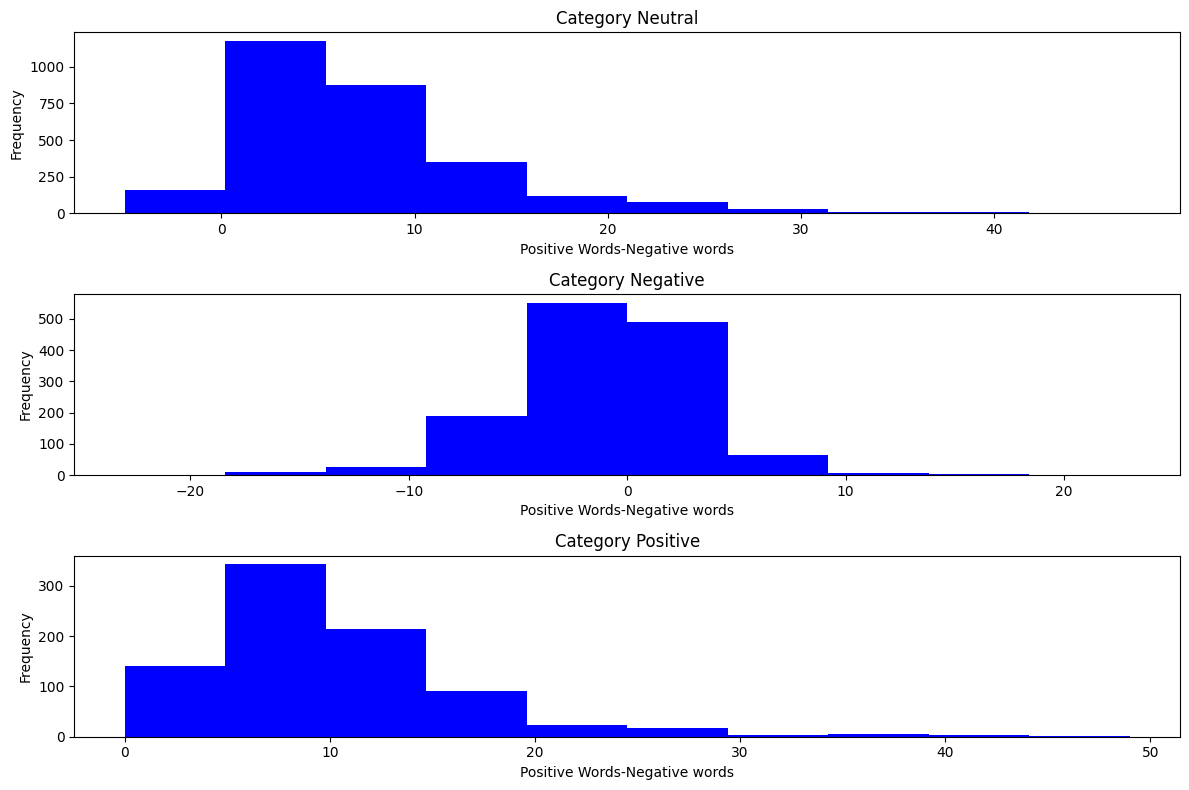

In [48]:
fig, axs = plt.subplots(len(categories), figsize=(12, 8))

# Iterate over each category and plot the histograms
for i, category in enumerate(categories):
    subset = data[data['Analysis'] == category]
    axs[i].hist(subset['Words weighted'], bins=10, color='blue')  # Plot positive words histogram
    axs[i].set_title(f'Category {category}')
    axs[i].set_xlabel('Positive Words-Negative words')
    axs[i].set_ylabel('Frequency')
    


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
print("Suma words positivos en label Positivo: ",data[data.Analysis=="Positive"]["Positive Words"].sum())
print("Suma words positivos en label Neutral: ",data[data.Analysis=="Neutral"]["Positive Words"].sum())
print("Suma words positivos en label Negativo: ",data[data.Analysis=="Negative"]["Positive Words"].sum())

Suma words positivos en label Positivo:  10025
Suma words positivos en label Neutral:  39159
Suma words positivos en label Negativo:  10901


In [52]:
print("Suma words negativos en label Positivo: ",data[data.Analysis=="Positive"]["Negative Words"].sum())
print("Suma words negativos en label Neutral: ",data[data.Analysis=="Neutral"]["Negative Words"].sum())
print("Suma words negativos en label Negativo: ",data[data.Analysis=="Negative"]["Negative Words"].sum())

Suma words negativos en label Positivo:  1622
Suma words negativos en label Neutral:  18525
Suma words negativos en label Negativo:  12607


In [53]:
print("Suma diferencia positivos-negativos en label Positivo: ",data[data.Analysis=="Positive"]["Words weighted"].sum())
print("Suma diferencia positivos-negativos en label Neutral: ",data[data.Analysis=="Neutral"]["Words weighted"].sum())
print("Suma diferencia positivos-negativos en label Negativo: ",data[data.Analysis=="Negative"]["Words weighted"].sum())

Suma diferencia positivos-negativos en label Positivo:  8403
Suma diferencia positivos-negativos en label Neutral:  20634
Suma diferencia positivos-negativos en label Negativo:  -1706


A pesar de la diferencia del número de palabras positivas vs negativas en la categoría neutral es mayor que la de la categoría positiva, en porcentaje el número de palabras positivas es mucho mayor en la categoría positiva que en la neutral, Así mismo, la razón por la que haya muchas palabras positivas y negativas a la vez en la categoría de neutral precisamente puede de cierta manera anular el efecto de las palabras positivas en cierto modo, por lo que probablemente esas palabras negativas hayan tenido un poco más de peso, anivelando el sentimiento del review.

In [ ]:

pd.crosstab(data['label2'], data['Analysis'],normalize="index") # se puede mejorar

Analysis,Negative,Neutral,Positive
label2,,,
negativo,0.470140,0.500601,0.029259
positivo,0.065868,0.625948,0.308184


Se aprecia como el metodo en el que nos basamos de Textblob tiene diferencias con el label original. Esto puede ser debido a que habría que analizar mejor el contexto de cada review además de solo ponderar el peso de cada palabra.

([<matplotlib.patches.Wedge at 0x7faa35f63b20>,
 [Text(-0.2176488080903215, 1.0782527516018043, 'Neutral'),
  Text(-0.3582703805174718, -1.0400203528988585, 'Negative'),
  Text(1.1641547922168183, -0.6835522070468483, 'Positive')],
 [Text(-0.1187175316856299, 0.5881378645100751, '56.3%'),
  Text(-0.1954202075549846, -0.5672838288539228, '26.8%'),
  Text(0.7329863506550336, -0.43038472295542296, '16.9%')])

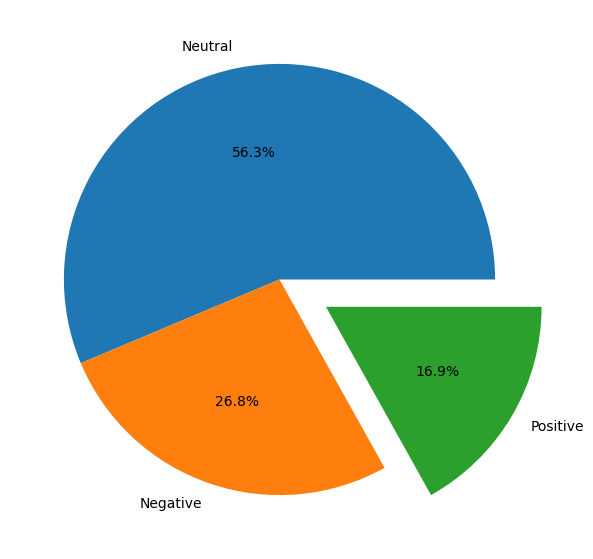

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_count.values, labels = tb_count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
data.loc[data.Analysis=="Positive","label3"]=1
data.loc[data.Analysis=="Neutral","label3"]=0
data.loc[data.Analysis=="Negative","label3"]=-1

# Aplicando modelo con paralelizacion

In [ ]:
features = data["text"].values
labels = data["label"].values

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from joblib import parallel_backend

In [ ]:
# Crear un clasificador SVM
classifier = svm.SVC(kernel='linear')

# Entrenar el clasificador utilizando paralelización
with parallel_backend('threading'):
    classifier.fit(X_train, y_train)

# Predecir las clases para los datos de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.835


In [ ]:
series = pd.Series(y_test)
series2 = pd.Series(y_pred)

# Obtener el recuento de valores únicos utilizando value_counts
value_counts = series.value_counts()
value_counts2 = series2.value_counts()
print(value_counts)
print()
print(value_counts2)

1    511
0    489
dtype: int64

1    548
0    452
dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[388 101]
 [ 64 447]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       489
           1       0.82      0.87      0.84       511

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000

0.835


([<matplotlib.patches.Wedge at 0x7faa52ffddb0>,
 [Text(-0.038005628110106465, 1.0993432458663475, '1'),
  Text(0.04664314454174576, -1.349193987930297, '0')],
 [Text(-0.020730342605512615, 0.5996417704725531, '51.1%'),
  Text(0.02936790582258066, -0.8494925109190756, '48.9%')])

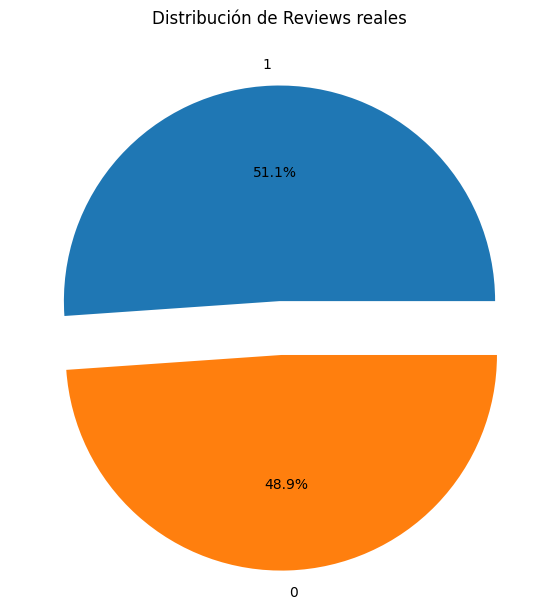

In [ ]:
real= value_counts
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews reales')
plt.pie(real.values, labels = real.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7faa54aabd30>,
 [Text(-0.16524807309281006, 1.087516930598836, '1'),
  Text(0.2028043283794274, -1.3346798883592164, '0')],
 [Text(-0.0901353125960782, 0.5931910530539105, '54.8%'),
  Text(0.12769161416482464, -0.8403540037817286, '45.2%')])

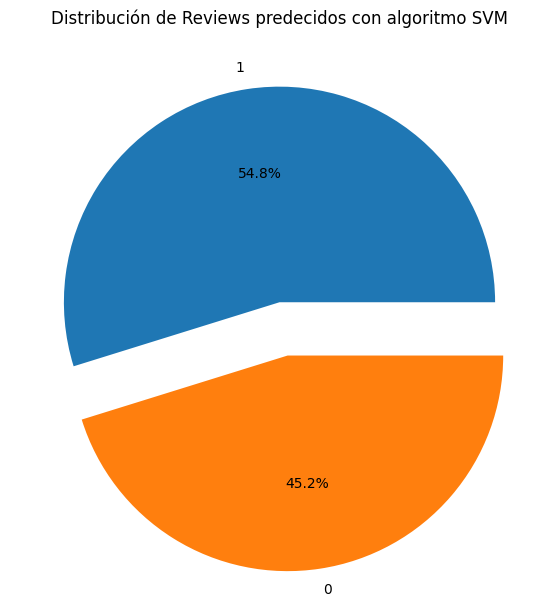

In [ ]:
predichos= value_counts2
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews predecidos con algoritmo SVM')
plt.pie(predichos.values, labels = real.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)

Aplicando un algoritmo de SVM sobre los pesos de las palabras dados por TfidfVectorizer, comparando nuestra y_test con nuestra y_predicha, tenemos un accuracy de 83.5%

**Usando el label de 3 categorías**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred,labels=[-1,0,1]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[154 106   1]
 [ 38 514  24]
 [  0  82  81]]
              precision    recall  f1-score   support

        -1.0       0.80      0.59      0.68       261
         0.0       0.73      0.89      0.80       576
         1.0       0.76      0.50      0.60       163

    accuracy                           0.75      1000
   macro avg       0.77      0.66      0.70      1000
weighted avg       0.76      0.75      0.74      1000

0.749


([<matplotlib.patches.Wedge at 0x7faa52eee740>,
 [Text(-0.26014881346968594, 1.068794926471077, '0.0'),
  Text(-0.2969212643263205, -1.059168429849974, '-1.0'),
  Text(1.176831931691629, -0.661488174158049, '1.0')],
 [Text(-0.14189935280164687, 0.5829790508024055, '57.6%'),
  Text(-0.16195705326890208, -0.5777282344636221, '26.1%'),
  Text(0.740968253287322, -0.41649255409951225, '16.3%')])

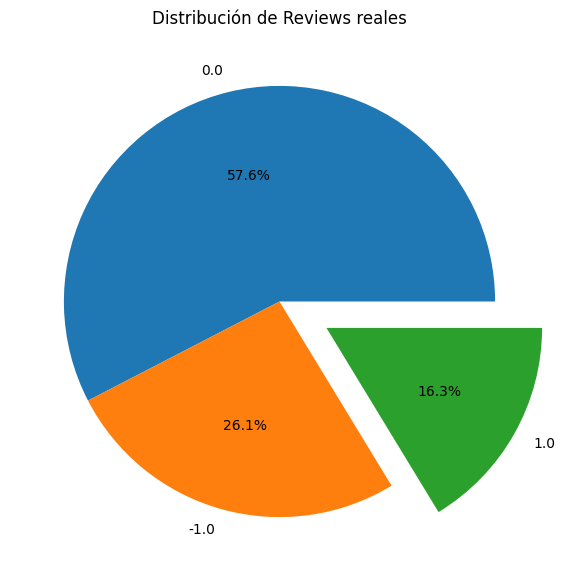

In [ ]:
real= value_counts
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews reales')
plt.pie(real.values, labels = real.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7faa52ab9e40>,
 [Text(-0.6521425632196803, 0.8858386293435534, '0.0'),
  Text(0.3267458899997187, -1.0503509524765007, '-1.0'),
  Text(1.275835215204122, -0.44129865583870975, '1.0')],
 [Text(-0.35571412539255287, 0.4831847069146654, '70.2%'),
  Text(0.17822503090893746, -0.5729187013508185, '19.2%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

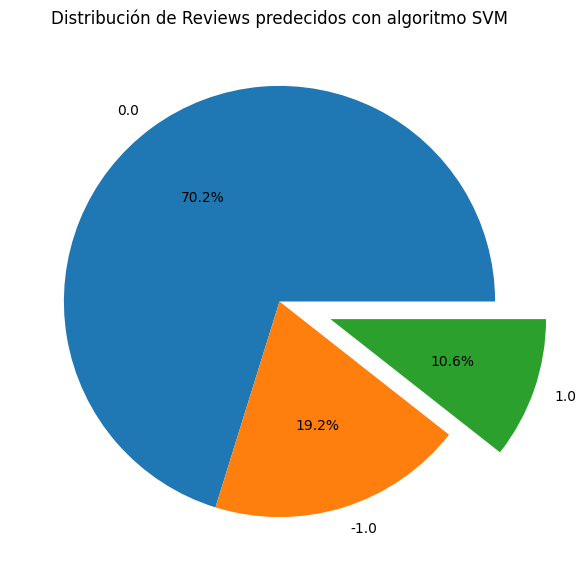

In [ ]:
predichos= value_counts2
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews predecidos con algoritmo SVM')
plt.pie(predichos.values, labels = real.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Aplicando un algoritmo de SVM sobre los pesos de las palabras dados por TfidfVectorizer, comparando nuestra y_test (en este caso tomando los labels dados por TextBlob) con nuestra y_predicha, tenemos un accuracy de 74.9%.